# Community Connectivity Preference

In [1]:
fmri_data_label = None
dwi_data_label = None
roi_subset = None
results_dir = None

In [2]:
# Parameters
dwi_data_label = "Yeh-HCP842"
results_dir = "/home/despo/dlurie/Projects/timescale_hierarchy/results"
fmri_data_label = "NKI-1400_HY_CompCorGSR"
roi_subset = "CX"


In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from stat import S_IREAD, S_IRGRP, S_IROTH

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('ticks')
sns.set_context('notebook')

In [5]:
dat = pd.read_csv(f'{results_dir}/stats/connectivity_preference/{fmri_data_label}_{dwi_data_label}_BNA_{roi_subset}_ComConnPref_resDF.csv', index_col=0)

In [6]:
dat = dat.set_index('gamma')

In [7]:
def fdr_and_annot(data_df):

    gamma_range = np.arange(5,36,1) / 10
    
    p_df = data_df[[i for i in data_df.columns if '_p' in i]]
    q_array = sm.stats.multipletests(p_df.values.ravel(), alpha=0.05, method='fdr_bh')[1].reshape((31,4))
    q_cols = [i.replace('_p', '_q') for i in p_df.columns]
    q_df = pd.DataFrame(q_array, index=p_df.index, columns=q_cols)

    annot_df = q_df <= 0.05

    annot_df = annot_df.replace(True, '*')
    annot_df = annot_df.replace(False, '')
    annot_df = pd.DataFrame(annot_df, index=q_df.index, columns=q_df.columns)
    
    return annot_df, q_df

In [8]:
annot_df, q_df = fdr_and_annot(dat)

In [9]:
out_path = f'{results_dir}/stats/connectivity_preference/{fmri_data_label}_{dwi_data_label}_BNA_{roi_subset}_ComConnPref_FDRq_df.csv'
q_df.to_csv(out_path)
os.chmod(out_path, S_IREAD|S_IRGRP|S_IROTH) # Make results read-only

## Main Effect of Community

In [10]:
stat_df_cd = dat[[i for i in dat.columns if '_f' in i]]
annot_df_cd = annot_df[[i for i in annot_df.columns if 'cd' in i]]

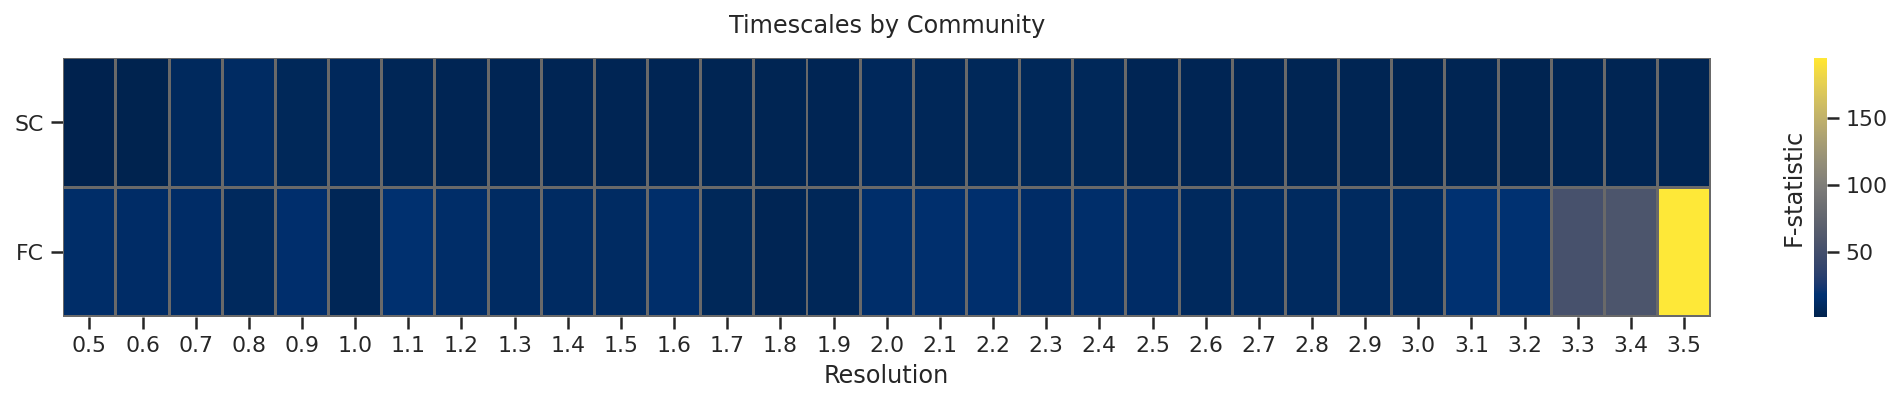

In [11]:
fig, ax1 = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(15,3))
sns.heatmap(stat_df_cd.T, cbar=True, linewidths=1, cmap='cividis', linecolor='dimgrey', ax=ax1,
           annot=annot_df_cd.T, fmt='', annot_kws={'fontweight':'black', 'fontsize':'large'},
           cbar_kws={'label':'F-statistic'}, yticklabels=['SC','FC'])
colorbar = ax1.collections[0].colorbar
colorbar.ax.yaxis.set_label_position('left')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("Timescales by Community", y=1.05)
plt.xlabel('Resolution')
plt.tight_layout()

## Within vs. Between Communities

In [12]:
stat_df_wb = dat[[i for i in dat.columns if '_t' in i]]
annot_df_wb = annot_df[[i for i in annot_df.columns if 'wb' in i]]

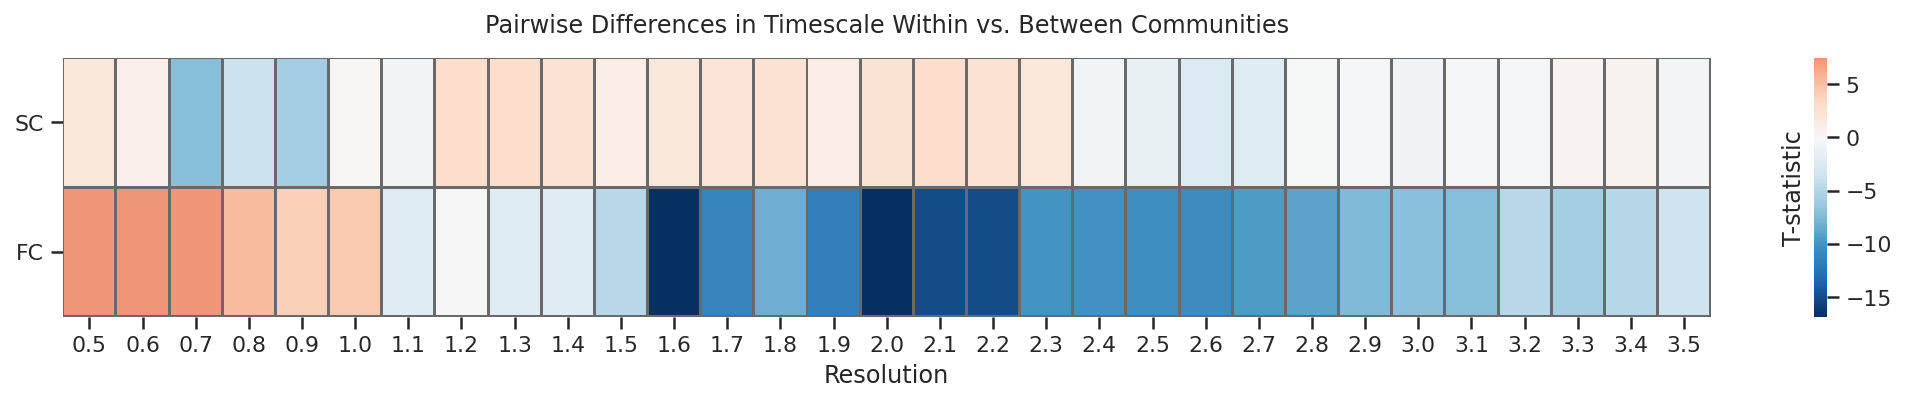

In [13]:
fig, ax1 = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(15,3))
sns.heatmap(stat_df_wb.T, cbar=True, linewidths=1, cmap='RdBu_r', linecolor='dimgrey', ax=ax1, center=0,
           annot=annot_df_wb.T, fmt='', annot_kws={'fontweight':'black', 'fontsize':'large'},
           cbar_kws={'label':'T-statistic'}, yticklabels=['SC','FC'])
colorbar = ax1.collections[0].colorbar
colorbar.ax.yaxis.set_label_position('left')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("Pairwise Differences in Timescale Within vs. Between Communities", y=1.05)
plt.xlabel('Resolution')
plt.tight_layout()